In [140]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as st

In [35]:
df = pd.read_csv('Dataset/train.csv')

In [36]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,label
0,1.0,a,-1d,0.828866,216.0,4.846091,K,50.0,0,161.714226,...,n,2.0,414.0,0.0,S,2.191401,a8,NaN,15.921017,1
1,8.0,a,-1d,8.981168,46.0,7.324911,A,270.0,0,328.559851,...,n,3.0,63.0,0.0,M,3.811778,a8,NaN,47.567140,0
2,1.0,a,-1d,1.458061,3304.0,7.548887,D,200.0,1,298.775554,...,n,1.0,218.0,0.0,M,4.284457,a4,NaN,10.522228,0
3,1.0,b,-1d,2.753682,212.0,8.200746,E,170.0,0,285.342907,...,y,2.0,NaN,0.0,D,4.680751,a7,NaN,21.185050,0
4,1.0,unknown,-1d,4.496872,1050.0,5.071094,B,260.0,1,328.464688,...,n,3.0,293.0,0.0,S,2.740114,a5,NaN,47.491164,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21931 entries, 0 to 21930
Data columns (total 22 columns):
0        21858 non-null float64
1        21842 non-null object
2        21875 non-null object
3        21826 non-null float64
4        21906 non-null float64
5        21871 non-null float64
6        21786 non-null object
7        21911 non-null float64
8        21931 non-null int64
9        21892 non-null float64
10       21828 non-null float64
11       21860 non-null float64
12       21918 non-null object
13       21891 non-null float64
14       17946 non-null float64
15       21832 non-null float64
16       21921 non-null object
17       21830 non-null float64
18       21847 non-null object
19       4250 non-null object
20       21930 non-null float64
label    21931 non-null int64
dtypes: float64(13), int64(2), object(7)
memory usage: 3.7+ MB


#### Notice that most of the values in column 19 are None values

In [50]:
df.groupby('1')['1'].count()

1
a          14397
b           1436
unknown     6009
Name: 1, dtype: int64

In [46]:
df.groupby('2')['2'].count()

2
-1d     17633
100d       18
101d       13
102d       19
103d       11
        ...  
96d        28
97d        34
98d        35
99d        24
9d          6
Name: 2, Length: 491, dtype: int64

In [69]:
df[df.columns[df.dtypes == 'object']].nunique()

1       3
2     491
6      11
12      2
16      3
18     12
19      3
dtype: int64

In [102]:
df[df.columns[df.dtypes == 'int64']].nunique()

8        2
label    2
dtype: int64

#### Column 8 is Binary

In [134]:
## find numeric columns
df_numeric_col = df[df.columns[df.dtypes == 'float64']]
df_numeric_col
# df_mean_std['std'] =  df[df.columns[df.dtypes == 'float64']].std().values
# df_mean_std['max'] =  df[df.columns[df.dtypes == 'float64']].max().values
# df_mean_std['min'] =  df[df.columns[df.dtypes == 'float64']].min().values


,0,3,4,5,7,9,10,11,13,14,15,17,20
0,1.0,0.828866,216.0,4.846091,50.0,161.714226,0.0,85.964376,2.0,414.0,0.0,2.191401,15.921017
1,8.0,8.981168,46.0,7.324911,270.0,328.559851,0.0,294.552881,3.0,63.0,0.0,3.811778,47.567140
2,1.0,1.458061,3304.0,7.548887,200.0,298.775554,0.0,317.615920,1.0,218.0,0.0,4.284457,10.522228
3,1.0,2.753682,212.0,8.200746,170.0,285.342907,0.0,181.773337,2.0,NaN,0.0,4.680751,21.185050
4,1.0,4.496872,1050.0,5.071094,260.0,328.464688,0.0,454.058222,3.0,293.0,0.0,2.740114,47.491164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21926,1.0,9.234068,228.0,6.497949,200.0,298.387445,0.0,199.845633,2.0,257.0,0.0,3.036520,23.647446
21927,3.0,1.425130,829.0,4.459834,270.0,330.998210,2.0,654.216171,0.0,196.0,0.0,2.108740,17.079316
21928,1.0,7.656161,296.0,6.688392,80.0,210.458322,0.0,97.943586,3.0,NaN,0.0,4.083415,26.412485
21929,2.0,4.016924,57.0,5.486059,90.0,220.485053,0.0,407.562382,2.0,404.0,0.0,2.587831,-2.056748


In [138]:
stats = df.describe().T.reset_index()
stats

,index,count,mean,std,min,25%,50%,75%,max
0,0,21858.0,2.709443,2.976380,1.000000,1.000000,2.000000,3.000000,51.000000
1,3,21826.0,4.204116,3.752786,-11.138786,1.605409,4.190917,6.811247,17.647593
2,4,21906.0,1383.256596,3030.087625,-8019.000000,80.000000,470.000000,1472.750000,102127.000000
3,5,21871.0,6.589936,0.921664,3.776680,5.901285,6.517118,7.246177,10.303540
4,7,21911.0,157.450596,83.121658,10.000000,80.000000,160.000000,210.000000,310.000000
5,8,21931.0,0.542429,0.498208,0.000000,0.000000,1.000000,1.000000,1.000000
6,9,21892.0,256.617674,71.635412,-1.892158,209.751981,277.786998,306.584649,347.191571
7,10,21828.0,0.608164,1.893069,0.000000,0.000000,0.000000,0.000000,41.000000
8,11,21860.0,268.845882,183.952200,0.003898,119.317515,242.093814,388.855035,1081.031042
9,13,21891.0,2.063816,0.784205,0.000000,2.000000,2.000000,3.000000,3.000000


In [139]:
# df.reset_index().plot.scatter(x='index', y='0')

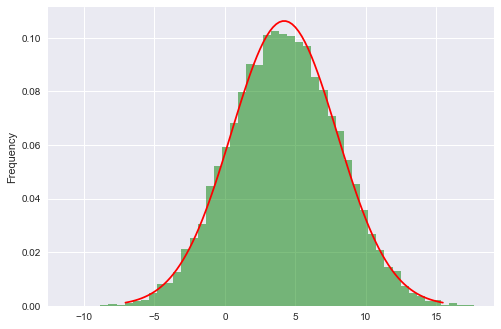

In [173]:
plt.style.use('seaborn')
df['3'].plot.hist(bins=50, density=1, alpha=0.5, color='g')
x = np.linspace(stats[stats['index'] == '3']['mean'] - 3*stats[stats['index'] == '3']['std'], 
                stats[stats['index'] == '3']['mean'] + 3*stats[stats['index'] == '3']['std'], 100)
plt.plot(x, st.norm.pdf(x, stats[stats['index'] == '3']['mean'], stats[stats['index'] == '3']['std']), c='r')

In [22]:
df.corr()

,0,3,4,5,7,8,9,10,11,13,14,15,17,20,label
0,1.000000,0.090564,-0.016967,0.009964,0.148854,-0.016146,0.125903,-0.040795,0.067913,-0.004287,-0.088212,0.021060,0.013737,0.009342,-0.088982
3,0.090564,1.000000,0.008787,-0.005487,0.595225,-0.010804,0.559471,-0.036505,0.235581,0.020109,-0.006195,0.007360,-0.009694,-0.003220,-0.015600
4,-0.016967,0.008787,1.000000,0.079775,0.010736,-0.070730,0.012900,0.023810,-0.016112,0.066848,0.019207,-0.065642,0.089116,0.004001,0.062469
5,0.009964,-0.005487,0.079775,1.000000,-0.011275,-0.158702,-0.009352,0.002224,-0.012126,-0.156433,-0.002931,-0.021401,0.900337,0.033696,0.011840
7,0.148854,0.595225,0.010736,-0.011275,1.000000,-0.027526,0.934719,-0.057871,0.408754,0.020601,-0.015932,0.002894,-0.012857,-0.000478,-0.029494
8,-0.016146,-0.010804,-0.070730,-0.158702,-0.027526,1.000000,0.004297,0.033749,-0.017673,-0.047802,-0.001613,-0.001384,-0.183501,-0.011306,-0.165548
9,0.125903,0.559471,0.012900,-0.009352,0.934719,0.004297,1.000000,-0.049853,0.346862,0.007414,-0.007818,0.000099,-0.011786,-0.002989,-0.043236
10,-0.040795,-0.036505,0.023810,0.002224,-0.057871,0.033749,-0.049853,1.000000,-0.026031,0.035655,0.000129,-0.024436,0.002636,-0.005110,0.132873
11,0.067913,0.235581,-0.016112,-0.012126,0.408754,-0.017673,0.346862,-0.026031,1.000000,0.007226,-0.012364,0.007591,-0.011609,-0.001808,0.002174
13,-0.004287,0.020109,0.066848,-0.156433,0.020601,-0.047802,0.007414,0.035655,0.007226,1.000000,-0.002458,-0.015145,-0.173396,-0.003954,0.065719


In [8]:
df.shape

(21931, 22)

In [6]:
df[(pd.isnull(df['19']))]

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,label
0,1.0,a,-1d,0.828866,216.0,4.846091,K,50.0,0,161.714226,...,n,2.0,414.0,0.0,S,2.191401,a8,NaN,15.921017,1
1,8.0,a,-1d,8.981168,46.0,7.324911,A,270.0,0,328.559851,...,n,3.0,63.0,0.0,M,3.811778,a8,NaN,47.567140,0
2,1.0,a,-1d,1.458061,3304.0,7.548887,D,200.0,1,298.775554,...,n,1.0,218.0,0.0,M,4.284457,a4,NaN,10.522228,0
3,1.0,b,-1d,2.753682,212.0,8.200746,E,170.0,0,285.342907,...,y,2.0,NaN,0.0,D,4.680751,a7,NaN,21.185050,0
4,1.0,unknown,-1d,4.496872,1050.0,5.071094,B,260.0,1,328.464688,...,n,3.0,293.0,0.0,S,2.740114,a5,NaN,47.491164,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21925,2.0,a,-1d,2.651005,1788.0,6.050346,B,80.0,0,207.001715,...,n,2.0,NaN,0.0,S,3.465326,a8,NaN,49.392625,0
21926,1.0,unknown,-1d,9.234068,228.0,6.497949,G,200.0,1,298.387445,...,n,2.0,257.0,0.0,S,3.036520,a5,NaN,23.647446,0
21928,1.0,a,-1d,7.656161,296.0,6.688392,A,80.0,1,210.458322,...,n,3.0,NaN,0.0,M,4.083415,a5,NaN,26.412485,0
21929,2.0,unknown,-1d,4.016924,57.0,5.486059,B,90.0,1,220.485053,...,n,2.0,404.0,0.0,S,2.587831,a5,NaN,-2.056748,0


In [25]:
pd.isnull(df['19'])


0         True
1         True
2         True
3         True
4         True
         ...  
21926     True
21927    False
21928     True
21929     True
21930     True
Name: 19, Length: 21931, dtype: bool